# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Content</div>
#### <span style='color:#2E8BC0'>1| </span> [Problem definition](#section-one)   
#### <span style='color:#2E8BC0'>2| </span> [Create date pipline](#section-two) 
#### <span style='color:#2E8BC0'>3| </span>[Visualize Some images](#section-three)
#### <span style='color:#2E8BC0'>4| </span>[Model building and training](#section-four)
#### <span style='color:#2E8BC0'>5| </span>[Visualize model perfromance](#section-fife) 

<a id="section-two"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%">Problem definition </div>

### <span style='color:#2E8BC0'> Goal !</span> 

#### In this notebook we will build a classification model `xception model` to classify between X_Ray images of people to tell if a person has Covid or not `positive or negative` Test depending on the X_ray image. </p>

### <span style='color:#2E8BC0'> Dateset </span> 

#### Fot This purpose we collected only `Normal/ positive` cases, regardless of other inflection in the chest.

In [1]:
import plotly.express as px 
import os  
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use("ggplot")

### train images

In [2]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA") 
# dictionary 
train_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [3]:
train_images

{'PNEUMONIA': 3875, 'Normal': 1341}

### Test images 

In [4]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/test/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA") 
# dictionary 
test_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [5]:
test_images

{'PNEUMONIA': 390, 'Normal': 234}

### Validation images 

In [6]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/val/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA") 
# dictionary 
validation_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [7]:
validation_images

{'PNEUMONIA': 8, 'Normal': 8}

## Show number of images in each split 

<BarContainer object of 2 artists>

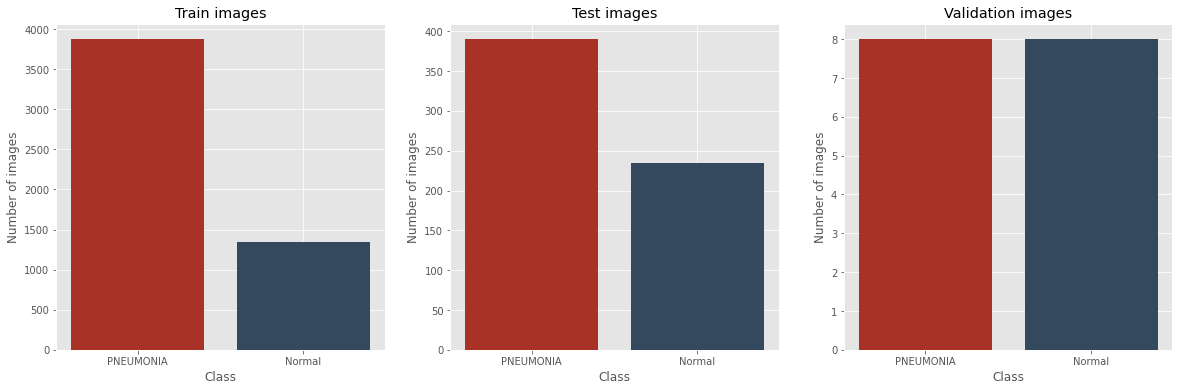

In [8]:
plt.figure(figsize=(20,6))

### show the train images 
plt.subplot(1,3,1)
plt.title("Train images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=train_images.keys(),height=train_images.values(),color=["#A93226","#34495E"])

### show the test images
plt.subplot(1,3,2)
plt.title("Test images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=test_images.keys(),height=test_images.values(),color=["#A93226","#34495E"])

### show the validation images
plt.subplot(1,3,3)
plt.title("Validation images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=validation_images.keys(),height=validation_images.values(),color=["#A93226","#34495E"])

#### We can  See that there  is  data `imbalance` in the traning dataset

<a id="section-two"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%"> Create data pipline</div>

#### <span style='color:#2E8BC0'>Import the libiraies</span>

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds 
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt 

In [10]:
# resize the image from 299 into 256 
img_size=256

#### <span style='color:#2E8BC0'>define the train generator</span>

In [11]:

# build the dataFlow from original data with dataAugmetation
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
).flow_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/train", # the data_path
    batch_size=64, # batch size in the data flow
    target_size=(img_size,img_size), # output image size (256,256)
    shuffle=True) # shuffling the images before training 

Found 5216 images belonging to 2 classes.


#### <span style='color:#2E8BC0'>Define validation_generator'</span>

In [12]:
# the val data generator 
val_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
#      rotation_range=10,
).flow_from_directory("../input/chest-xray-pneumonia/chest_xray/val",
                      batch_size=16,
                      target_size=(img_size,img_size),
                      shuffle=True)

Found 16 images belonging to 2 classes.


#### <span style='color:#2E8BC0'>define Test_generator </span>

In [13]:
# the test DataGenerator
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
).flow_from_directory("../input/chest-xray-pneumonia/chest_xray/test",
                      batch_size=128,
                      target_size=(img_size,img_size),
                     shuffle=True)

Found 624 images belonging to 2 classes.


<a id="section-three"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%">Viualize some images </div>

#### <span style='color:#2E8BC0'>Show some images from the data </span>

In [14]:
# get the classes names form the data 
classes=list(train_generator.class_indices.keys())
classes 

['NORMAL', 'PNEUMONIA']

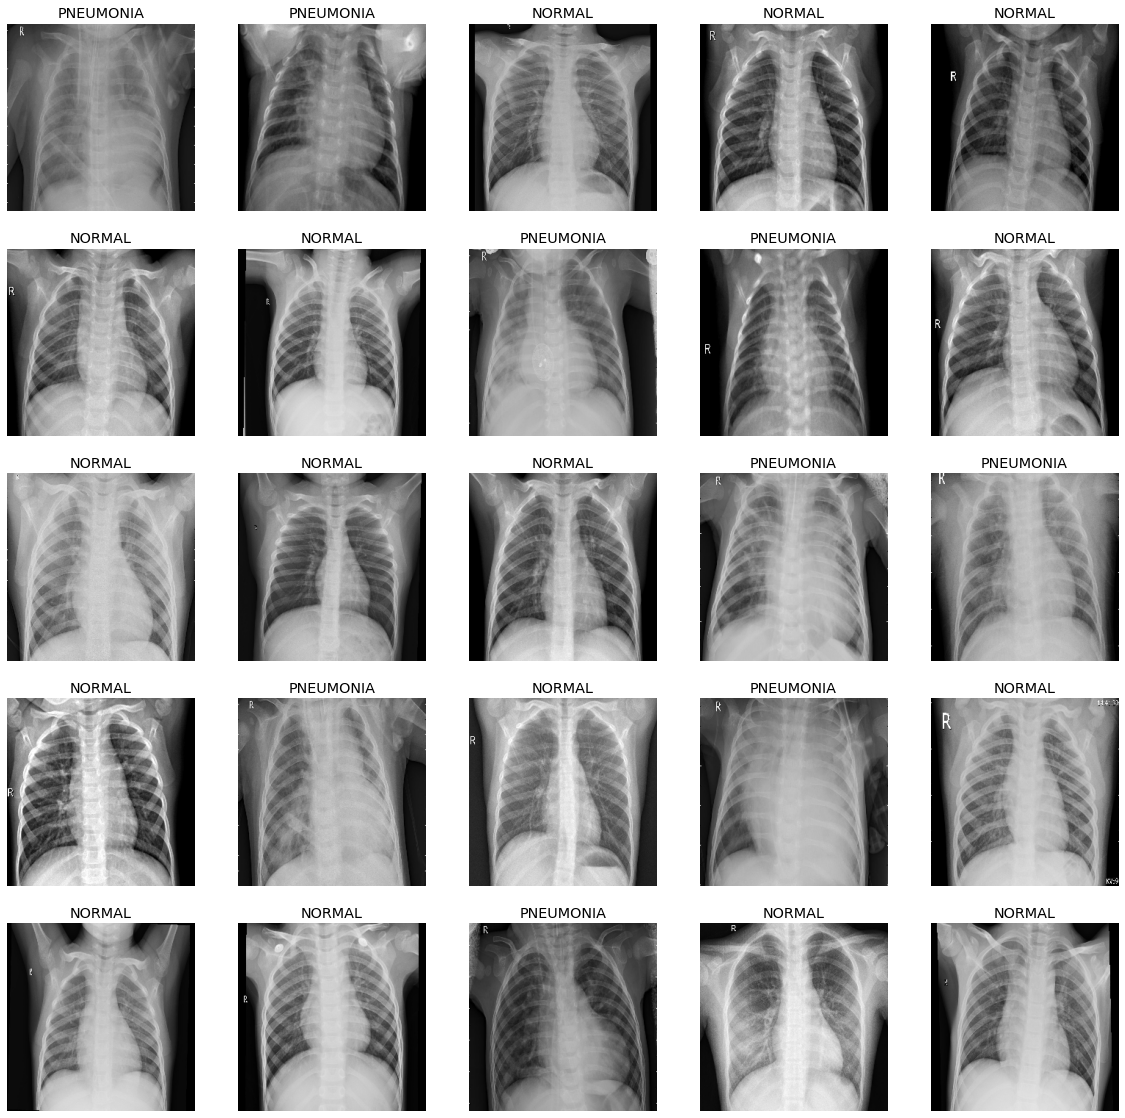

In [15]:
# show 24 images from the data
plt.figure(figsize=(20,20))
for images, labels in test_generator :
    # create a grid of 4x3 images
    for i in range(0,25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classes[np.where(labels[i]==1)[0][0]])
        plt.axis('off')
    # show the plot
    plt.show()
    break

<a id="section-four"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%">building and traning the model</div>

### Using the principle of transfer learning , we will use <span style="color:red">Xception Model </span> and remove the output layers 

In [16]:
# load the VGG16 model from tensorflow 
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D

#### <span style='color:#2E8BC0'>Import the Xception model and change output layers
</span>

<span style="color:red;font-size:18px"> we will let the last 10 layers of the xception model to be trained and use the imagenet weights as initial weights, Sure this will Enhance the model `peformance`</span>

In [17]:
# define the model without it top dense layers 
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256,3)))
# build the VGG16 model as input of the new model
x = baseModel.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten(name="flatten")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(2, activation="softmax")(x)

model = Model(inputs=baseModel.input, outputs=x)
# we don not want the VGG16 model to be trained, only traning the top few layers 
# the next code will not let the model to train the layers of the model, except [last_10_conv_layers and dense_layers ]
for layer in baseModel.layers[:-10]:
    layer.trainable = False


83697664/83683744 [==============================] - 4s 0us/step


#### <span style='color:#2E8BC0'>Show the model structure , weights .. </span>

In [18]:
model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [19]:
# compile the model 
model.compile(optimizer="adam",
              loss ='categorical_crossentropy',
              metrics=["accuracy"])

#### <span style='color:#2E8BC0'>`Callbacks` to store model best performane </span>

In [20]:
# callbacks 
check=tf.keras.callbacks.ModelCheckpoint("./best_weights_2.h5",monitor="val_accuracy")
callback = [check] 

## <span style='color:#2E8BC0'>Start Training the model </span>

In [ ]:
history=model.fit(train_generator, # the training generator
                  validation_data=val_generator,
                  epochs=30, # number of tranings over all the dataset
                  steps_per_epoch=50,  
                  callbacks=callback, # to save best weights
                  verbose = 1 # to show the history of the model
                  )

Epoch 1/30
50/50 [==============================] - 430s 8s/step - loss: 0.3653 - accuracy: 0.9050 - val_loss: 2.7383 - val_accuracy: 0.5000


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
50/50 [==============================] - 421s 8s/step - loss: 0.1208 - accuracy: 0.9578 - val_loss: 1.0278 - val_accuracy: 0.6250
Epoch 3/30
50/50 [==============================] - 418s 8s/step - loss: 0.0930 - accuracy: 0.9656 - val_loss: 0.5692 - val_accuracy: 0.6250
Epoch 4/30
50/50 [==============================] - 415s 8s/step - loss: 0.0766 - accuracy: 0.9716 - val_loss: 0.3498 - val_accuracy: 0.8750
Epoch 5/30
50/50 [==============================] - 414s 8s/step - loss: 0.0788 - accuracy: 0.9700 - val_loss: 0.2677 - val_accuracy: 0.9375
Epoch 6/30
50/50 [==============================] - 416s 8s/step - loss: 0.0711 - accuracy: 0.9747 - val_loss: 0.2813 - val_accuracy: 0.8750
Epoch 7/30
22/50 [============>.................] - ETA: 3:52 - loss: 0.0583 - accuracy: 0.9808

In [ ]:
# save the model 
model.save("./weights.h5")

In [ ]:
model.load_weights("./best_weights_2.h5")

#### <span style='color:#2E8BC0'>Evaluate the model on `Test_data` the model didn't see </span>

In [ ]:
# test the model in all the images in the test folder
test_accuracy = model.evaluate(test_generator)[-1]

In [ ]:
print(f"Accuracy on Test_data : {round(test_accuracy,3)}") 

#### <span style='color:#2E8BC0'>Show model performance `History` </span>

In [ ]:
plt.style.use("ggplot")

In [ ]:
plt.figure(figsize=(12, 8))
# the loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Loss Curve')
# the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title('Accuraccy Curve')

<a id="section-fife"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize model performance</div>

In [ ]:
# get the classes names form the data 
classes=list(train_generator.class_indices.keys()) 
classes 

In [ ]:
# show 24 images from the dat
plt.figure(figsize=(20,20)) 
for images, labels in test_generator:
    # create a grid of 3x4 images
    for i in range(0,30):
        # make the subplot
        plt.subplot(10,3,i+1)
        # show the images
        plt.imshow(images[i])
        # predict the images
        predictions = model.predict(images)
        # get the precidted label
        predicted_class = classes[np.argmax(predictions[i])]
        # get the prediction probalility
        accuracy = round(np.max(predictions[i][-1]),3)
        # name of actual class
        actual_class = classes[np.where(labels[i]==1)[0][0]]
        # update the plot title 
        plt.title(f"Actual class : {actual_class} \nPredicted class : {predicted_class} \nProbability to be PNEUMONIA : {np.round(float(accuracy),4)}",fontsize = 10)
        plt.axis('off')
    # show the plot
    plt.tight_layout() 
    plt.show()
    break

<a id="section-fife"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:10px;color:white;overflow:hidden;margin:0;font-size:100%">Summary</div>

### In this norebook we worked though :
***


#### <span style='color:#2E8BC0'> Downloading the data and upload only [covid,normal] images </span>
#### <span style='color:#2E8BC0'> Build pipline for the data with `Data Augmentation` to enhance model performance </span>
#### <span style='color:#2E8BC0'> Using `Xception` Model that is build_in `keras` libilary</span>
#### <span style='color:#2E8BC0'> Change the TOP LAYERS of the model to use in our case </span>
#### <span style='color:#2E8BC0'> Traning the model Using our images</span>
#### <span style='color:#2E8BC0'> Evaluate the model and test it on blind_dataset</span>
#### <span style='color:#2E8BC0'>Visualize the model performance</span>